# as the number of negative classes remain the same in both balance and imbalanced dataset we can draw unbiased comparison between the two

In [84]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt




np.random.seed(2)


In [85]:
dataset = pd.read_csv(r'C:\Users\Naman Bhoj\Desktop\Feb-April\in process 2021\cicn 2 mayank\data\data_with_class.csv')

In [86]:
dataset

,Unnamed: 0,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,...,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18,sentiment
0,0,1378654719166529540,RT @MAhealthforkids : It’s not only #pediatric...,"Cathryn Hampson, MSN, RN, NCSN",cathryn_hampson,2021-04-04T10:24:33.000Z,Sun Apr 04 10:24:33 +0000 2021,0,0,en,...,Retweet,https://debeaumont.org/changing-the-covid-conv...,3,0,photo,https://pbs.twimg.com/media/Ex-94FvWQAkYAIJ.jpg,NaN,NaN,NaN,1
1,1,1378654639214768129,RT @ger_majesty : I was so angry I made a sket...,Katrina Doherty,Katrinadoherty,2021-04-04T10:24:14.000Z,Sun Apr 04 10:24:14 +0000 2021,0,0,en,...,Retweet,https://youtu.be/DxwPMBZSLOQ,8,3,NaN,NaN,NaN,NaN,NaN,0
2,2,1378654614539665412,RT @SteveCameronPr1 : Former #Jeopardy contest...,Carly G Jeffries,Shasha1960G,2021-04-04T10:24:08.000Z,Sun Apr 04 10:24:08 +0000 2021,0,0,en,...,Retweet,https://www.greenbaypressgazette.com/story/new...,4,0,photo,https://pbs.twimg.com/media/EyAN28IVgAEe4Hp.jpg,NaN,NaN,NaN,1
3,3,1378654597057638402,RT @hotvickkrishna : How the mRNA Vaccine (Mod...,Kawal Oberoi,TheKawalOberoi,2021-04-04T10:24:04.000Z,Sun Apr 04 10:24:04 +0000 2021,0,0,en,...,Retweet,NaN,8,0,video,https://video.twimg.com/ext_tw_video/137448130...,NaN,NaN,NaN,1
4,4,1378654537033117698,RT @hotvickkrishna : How the mRNA Vaccine (Mod...,Sanghmitra Hitaishi,sanghmitrahit20,2021-04-04T10:23:50.000Z,Sun Apr 04 10:23:50 +0000 2021,0,0,en,...,Retweet,NaN,8,0,video,https://video.twimg.com/ext_tw_video/137448130...,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2053,1378512268980150276,RT @SanjayMehta_ : #computer लिया. वायरस आया. ...,ⓖⓤⓛⓐⓜ qⓤⓐⓓⓘⓡ गुलाम क़ादिर غلام قادر🇮🇳,IamGulamQuadir,2021-04-04T00:58:31.000Z,Sun Apr 04 00:58:31 +0000 2021,0,0,hi,...,Retweet,NaN,7,0,NaN,NaN,NaN,NaN,NaN,1
2054,2054,1378512253096443909,🚨Alas this continues to happen! Just TODAY ano...,Massachusetts COVID Vaccination Help,macovidvaxhelp,2021-04-04T00:58:27.000Z,Sun Apr 04 00:58:27 +0000 2021,31,21,en,...,Tweet,https://twitter.com/macovidvaxhelp/status/1375...,1,1,NaN,NaN,NaN,NaN,NaN,1
2055,2055,1378512142077464577,RT @Redpainter1 : I fully support your right t...,Mask Wearing Amy,amyriscool,2021-04-04T00:58:00.000Z,Sun Apr 04 00:58:00 +0000 2021,0,0,en,...,Retweet,NaN,3,0,NaN,NaN,NaN,NaN,NaN,1
2056,2056,1378512057440464901,RT @MoHFW_INDIA : #LargestVaccineDrive \n\nMor...,Abhilash Verma,abhiverma_khg,2021-04-04T00:57:40.000Z,Sun Apr 04 00:57:40 +0000 2021,0,0,en,...,Retweet,https://pib.gov.in/PressReleseDetail.aspx?PRID...,3,0,photo,https://pbs.twimg.com/media/EyDz-ONUYAEgDkb.jpg,NaN,NaN,NaN,1


# keep only those rows which have language as english

In [87]:
dataset['Language'].value_counts()

en     1730
hi       77
und      70
gu       39
ur       33
es       25
mr       12
fr       12
de        8
pt        7
ja        7
pa        6
nl        5
kn        5
zh        4
et        2
si        2
da        2
tr        1
ne        1
th        1
ta        1
it        1
fa        1
el        1
or        1
no        1
ml        1
in        1
ca        1
Name: Language, dtype: int64

In [88]:
index_names = dataset[ dataset['Language'] != 'en' ].index

In [89]:
len(index_names)

328

In [90]:
dataset.drop(index_names, inplace = True)

In [91]:
len(dataset)

1730

In [92]:
dataset = dataset[['Text','sentiment']]

# investigate sample text data, RT means retweet and then user name what you can do is remove any text before it

In [106]:
dataset['Text'].iloc[1719]

'RT @MargaretSiegien : Hello my Friends, i just got my first dose of @Pfizer #vaccine💉💪💉I am encouraging everyone to get #vaccinated ASAP, it will help #SaveLives🙏 https://t.co/6xLuJZv7FK'

In [11]:
sample = "I had a migraine every day after my first covid shot on St. Patrick's day. I got Maderna. I get my next one April 14th. I had to switch to a different migraine med to make it go away. I'm prone to migraines in spring and fall anyway, though. #COVIDvaccine #vaccine"

In [12]:
import re

re.sub('(?:\s)@[^, ]*', '', sample)

"I had a migraine every day after my first covid shot on St. Patrick's day. I got Maderna. I get my next one April 14th. I had to switch to a different migraine med to make it go away. I'm prone to migraines in spring and fall anyway, though. #COVIDvaccine #vaccine"

In [13]:
dataset['Text'].iloc[1712]

'RT @MargaretSiegien : Hello my Friends, i just got my first dose of @Pfizer #vaccine💉💪💉I am encouraging everyone to get #vaccinated ASAP, it will help #SaveLives🙏 https://t.co/6xLuJZv7FK'

In [14]:
sample2 = 'RT @MargaretSiegien : Hello my Friends, i just got my first dose of @Pfizer #vaccine💉💪💉I am encouraging everyone to get #vaccinated ASAP, it will help #SaveLives🙏 https://t.co/6xLuJZv7FK'

In [15]:
import re

sample2 = re.sub('(?:\s)@[^, ]*', '', sample2)
sample2 = re.sub('RT', '', sample2)

In [16]:
sample2

' : Hello my Friends, i just got my first dose of #vaccine💉💪💉I am encouraging everyone to get #vaccinated ASAP, it will help #SaveLives🙏 https://t.co/6xLuJZv7FK'

In [17]:
for i in range(0, len(dataset)):
    stringstore = dataset['Text'].iloc[i] 
    stringstore = re.sub('(?:\s)@[^, ]*', '', stringstore)
    stringstore = re.sub('RT', '', stringstore)
    dataset['Text'].iloc[i] = stringstore

C:\Users\Naman Bhoj\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-17-bd2eedb19165>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Text'].iloc[i] = stringstore


In [18]:
dataset['Text'].iloc[1729]

"I had a migraine every day after my first covid shot on St. Patrick's day. I got Maderna. I get my next one April 14th. I had to switch to a different migraine med to make it go away. I'm prone to migraines in spring and fall anyway, though. #COVIDvaccine #vaccine"

# look at the above example if its just information and no sentiment is shown in it then it would be considered as positive as you have to think psychologically as covid  vaccine is need of an hour so if you dont listen anything negative then most likely you consider it positive and safe

# now we will start preprocessing , we also have emojis, urls, #, and other symbol so keep in mind to completely remove them from the picture

In [19]:
dataset["Text"] = dataset["Text"].str.lower()
dataset.head()


<ipython-input-19-0eba4ca2e3e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Text"] = dataset["Text"].str.lower()


,Text,sentiment
0,: it’s not only #pediatricians &amp; #nurses ...,1
1,": i was so angry i made a sketch. ""schools ar...",0
2,: former #jeopardy contestant #saraholub die...,1
3,: how the mrna vaccine (moderna/pfizer) works...,1
4,: how the mrna vaccine (moderna/pfizer) works...,1


In [20]:
dataset['Text'].iloc[0]

' : it’s not only #pediatricians &amp; #nurses who can make a difference in busting #vaccine myths. we all have family members, coworkers  &amp; neighbors whom we can provide information without stigmatizing or offending. \n\nhttps://t.co/cpoix5lymz https://t.co/bqmqxxwu7w'

In [21]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [22]:
dataset['Text'] = dataset['Text'].apply(lambda text:remove_urls(text))

<ipython-input-22-97f6cde90d0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Text'] = dataset['Text'].apply(lambda text:remove_urls(text))


In [23]:
dataset['Text'].iloc[0]

' : it’s not only #pediatricians &amp; #nurses who can make a difference in busting #vaccine myths. we all have family members, coworkers  &amp; neighbors whom we can provide information without stigmatizing or offending. \n\n '

# remove \n which is in many places in text

In [24]:
for i in range(0, len(dataset)):
    stringstore = dataset['Text'].iloc[i] 
    stringstore = re.sub('(?:\s)\n[^, ]*', '', stringstore)
    
    dataset['Text'].iloc[i] = stringstore

C:\Users\Naman Bhoj\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-24-60c9998455cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Text'].iloc[i] = stringstore


In [25]:
dataset['Text'].iloc[0]

' : it’s not only #pediatricians &amp; #nurses who can make a difference in busting #vaccine myths. we all have family members, coworkers  &amp; neighbors whom we can provide information without stigmatizing or offending. '

In [26]:
import string

In [27]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

dataset["Text"] = dataset["Text"].apply(lambda text: remove_punctuation(text))
dataset.head()

<ipython-input-27-61c911118ce2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Text"] = dataset["Text"].apply(lambda text: remove_punctuation(text))


,Text,sentiment
0,it’s not only pediatricians amp nurses who c...,1
1,i was so angry i made a sketch schools are s...,0
2,former jeopardy contestant saraholub dies 4...,1
3,how the mrna vaccine modernapfizer works pfi...,1
4,how the mrna vaccine modernapfizer works pfi...,1


In [28]:
dataset['Text'].iloc[4]

'  how the mrna vaccine modernapfizer works pfizer moderna vaccinated vaccine  vaccineswork covidー19 coronavirus mrna '

In [29]:
dataset.tail(10)

,Text,sentiment
2045,this should be shared in millions across soc...,0
2046,well that is the first covid vaccine complete ...,1
2049,mongolia on apr 2 received 1st batch of covid1...,1
2050,at 40 years old it was determined sara died ...,1
2051,sinopharm covid19 vaccine has acquired the c...,1
2052,tim ray interviews exfema employee celeste s...,1
2054,🚨alas this continues to happen just today anot...,1
2055,i fully support your right to not get the co...,1
2056,largestvaccinedrive than 744 cr covid19 vacc...,1
2057,i had a migraine every day after my first covi...,1


# removing stopwords

In [30]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to C:\Users\Naman
[nltk_data]     Bhoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dataset["Text"] = dataset["Text"].apply(lambda text: remove_stopwords(text))

<ipython-input-31-e675b8128cb7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Text"] = dataset["Text"].apply(lambda text: remove_stopwords(text))


In [32]:
dataset['Text'].iloc[0]

'it’s pediatricians amp nurses make difference busting vaccine myths family members coworkers amp neighbors provide information without stigmatizing offending'

# remove emoji

In [33]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [34]:
dataset['Text'].iloc[1726]

'🚨alas continues happen today another requestors turned away volunteer intervened w staff amp explained ids amp required receive scheduled vaccine please provide better training amp guidance staff'

In [35]:
dataset['Text'].iloc[1721]

'well first covid vaccine complete ✅ went well 😍 24th anniversary think best gift ever 🎁 gives us hope celebrate 25th abroad 🙏'

In [36]:
dataset["Text"] = dataset["Text"].apply(lambda text: remove_emoji(text))

<ipython-input-36-a2c2dab72959>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Text"] = dataset["Text"].apply(lambda text: remove_emoji(text))


In [37]:
dataset['Text'].iloc[1721]

'well first covid vaccine complete  went well  24th anniversary think best gift ever  gives us hope celebrate 25th abroad '

In [38]:
dataset['Text'].iloc[1726]

'alas continues happen today another requestors turned away volunteer intervened w staff amp explained ids amp required receive scheduled vaccine please provide better training amp guidance staff'

# remove rare words

In [39]:
from collections import Counter
cnt = Counter()
for text in dataset["Text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(1000)

[('vaccine', 2195),
 ('covid19', 777),
 ('get', 362),
 ('amp', 348),
 ('vaccinated', 294),
 ('covid', 283),
 ('people', 210),
 ('coronavirus', 205),
 ('wants', 170),
 ('moment', 169),
 ('dose', 167),
 ('india', 165),
 ('fully', 164),
 ('second', 160),
 ('support', 152),
 ('today', 138),
 ('across', 137),
 ('us', 134),
 ('pandemic', 128),
 ('first', 124),
 ('vaccination', 119),
 ('rollout', 118),
 ('update', 112),
 ('im', 109),
 ('one', 109),
 ('astrazeneca', 108),
 ('social', 107),
 ('monday', 105),
 ('new', 104),
 ('vaccines', 104),
 ('shared', 104),
 ('media', 103),
 ('nhs', 102),
 ('health', 101),
 ('wave', 100),
 ('received', 99),
 ('pushing', 98),
 ('shame', 98),
 ('behaviour', 98),
 ('pushed', 98),
 ('millions', 97),
 ('educated', 97),
 ('cc', 97),
 ('numbers', 97),
 ('shot', 96),
 ('platforms', 96),
 ('urban', 96),
 ('elite', 96),
 ('whose', 96),
 ('irresponsible', 96),
 ('socalled', 96),
 ('shortage', 96),
 ('doses', 95),
 ('right', 94),
 ('boris', 94),
 ('take', 94),
 ('also',

In [40]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

dataset["Text"] = dataset["Text"].apply(lambda text: remove_rarewords(text))


<ipython-input-40-f76d4cc7f355>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Text"] = dataset["Text"].apply(lambda text: remove_rarewords(text))


In [41]:
dataset

,Text,sentiment
0,it’s pediatricians amp nurses make difference ...,1
1,angry made sketch schools safe covid19ireland ...,0
2,former jeopardy contestant saraholub dies 4 da...,1
3,mrna vaccine modernapfizer works pfizer modern...,1
4,mrna vaccine modernapfizer works pfizer modern...,1
...,...,...
2052,tim ray interviews exfema employee celeste sol...,1
2054,alas continues happen today another requestors...,1
2055,fully support right get covid vaccine also ful...,1
2056,largestvaccinedrive 744 cr covid19 vaccine dos...,1


In [42]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

dataset["text_lemmatized"] = dataset["Text"].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package wordnet to C:\Users\Naman
[nltk_data]     Bhoj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-42-05edcaeae380>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["text_lemmatized"] = dataset["Text"].apply(lambda text: lemmatize_words(text))


In [43]:
dataset

,Text,sentiment,text_lemmatized
0,it’s pediatricians amp nurses make difference ...,1,it’s pediatrician amp nurse make difference bu...
1,angry made sketch schools safe covid19ireland ...,0,angry made sketch school safe covid19ireland c...
2,former jeopardy contestant saraholub dies 4 da...,1,former jeopardy contestant saraholub dy 4 day ...
3,mrna vaccine modernapfizer works pfizer modern...,1,mrna vaccine modernapfizer work pfizer moderna...
4,mrna vaccine modernapfizer works pfizer modern...,1,mrna vaccine modernapfizer work pfizer moderna...
...,...,...,...
2052,tim ray interviews exfema employee celeste sol...,1,tim ray interview exfema employee celeste solu...
2054,alas continues happen today another requestors...,1,ala continues happen today another requestors ...
2055,fully support right get covid vaccine also ful...,1,fully support right get covid vaccine also ful...
2056,largestvaccinedrive 744 cr covid19 vaccine dos...,1,largestvaccinedrive 744 cr covid19 vaccine dos...


In [44]:
dataset.drop(['Text'],axis = 1 , inplace = True)

C:\Users\Naman Bhoj\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
dataset

,sentiment,text_lemmatized
0,1,it’s pediatrician amp nurse make difference bu...
1,0,angry made sketch school safe covid19ireland c...
2,1,former jeopardy contestant saraholub dy 4 day ...
3,1,mrna vaccine modernapfizer work pfizer moderna...
4,1,mrna vaccine modernapfizer work pfizer moderna...
...,...,...
2052,1,tim ray interview exfema employee celeste solu...
2054,1,ala continues happen today another requestors ...
2055,1,fully support right get covid vaccine also ful...
2056,1,largestvaccinedrive 744 cr covid19 vaccine dos...


# in balance dataset just perform oversampling here

In [46]:
dataset['sentiment'].value_counts()

1    1092
0     638
Name: sentiment, dtype: int64

In [47]:
!pip install imblearn

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(dataset['text_lemmatized'], dataset['sentiment'], random_state = 2, test_size = 0.2)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
from nltk.corpus import words

In [51]:

tv = TfidfVectorizer(
                    ngram_range = (1,3),
                    sublinear_tf = True,
                    max_features = 40000)

In [52]:
train_tv = tv.fit_transform(x_train)

In [53]:
test_tv = tv.transform(x_test)


In [54]:
from sklearn.metrics import confusion_matrix

In [107]:
from imblearn.under_sampling import EditedNearestNeighbours

X_train_resampled, y__train_resampled = EditedNearestNeighbours(sampling_strategy = 'majority').fit_resample(train_tv, y_train )


In [56]:

X_test_resampled, y__test_resampled =EditedNearestNeighbours(sampling_strategy = 'majority').fit_resample(test_tv, y_test )


In [57]:
print(X_train_resampled.shape, X_test_resampled.shape)

(1178, 22227) (262, 22227)


In [58]:
!pip install wordcloud

In [59]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [60]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

# train data visualisation, most og the emphasised words are vaccine , covid19 , shame , support, which will help in positive and negative

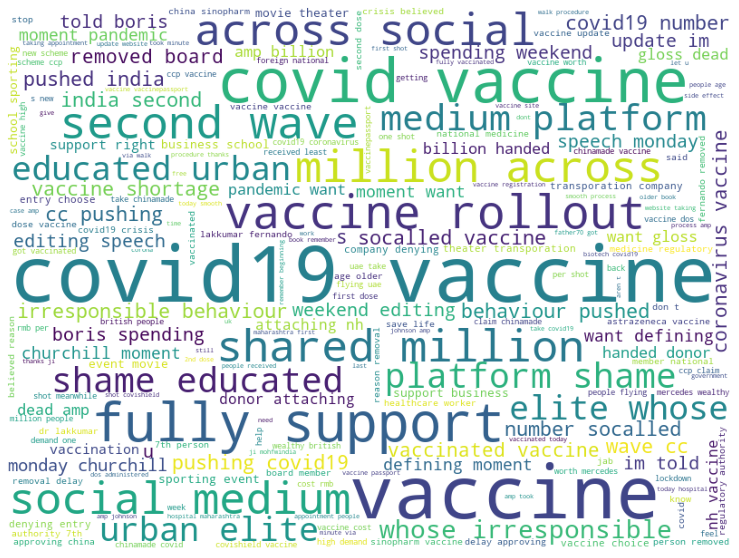

In [61]:
cloud(' '.join(x_train))

In [62]:
#for test data

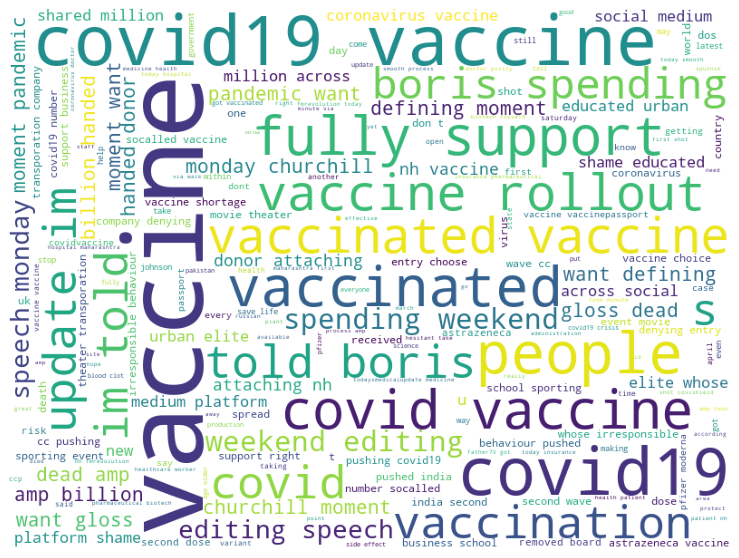

In [63]:
cloud(' '.join(x_test))

In [64]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [65]:
kfold = StratifiedKFold( n_splits = 5, random_state = 2 , shuffle = True)


In [66]:
sv = LinearSVC(random_state=2018)




sv.fit(X_train_resampled, y__train_resampled)


LinearSVC(random_state=2018)

In [67]:
prediction1 = sv.predict(X_test_resampled)

In [68]:
from sklearn.metrics import classification_report


In [69]:

cr1 = classification_report(y__test_resampled,prediction1,digits = 5)

In [70]:
print(cr1)

              precision    recall  f1-score   support

           0    0.90265   0.84298   0.87179       121
           1    0.87248   0.92199   0.89655       141

    accuracy                        0.88550       262
   macro avg    0.88757   0.88248   0.88417       262
weighted avg    0.88642   0.88550   0.88512       262



In [71]:
cf1 = confusion_matrix(y__test_resampled,prediction1)
cf1

array([[102,  19],
       [ 11, 130]], dtype=int64)

 # as minority oversampling is done report results for  minority class in major
# that is class 0 which means negative sentiment towards vaccination

# report precision and f1 -score for negative class

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

abc = GradientBoostingClassifier()

In [73]:
abc.fit(X_train_resampled, y__train_resampled)

GradientBoostingClassifier()

In [74]:
submission2 = abc.predict(X_test_resampled)

In [75]:

cr3 = classification_report(y__test_resampled,submission2,digits = 5)

In [76]:
print(cr3)

              precision    recall  f1-score   support

           0    0.89524   0.77686   0.83186       121
           1    0.82803   0.92199   0.87248       141

    accuracy                        0.85496       262
   macro avg    0.86163   0.84942   0.85217       262
weighted avg    0.85907   0.85496   0.85372       262



In [77]:
cf2 = confusion_matrix(y__test_resampled, submission2)
cf2

array([[ 94,  27],
       [ 11, 130]], dtype=int64)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [79]:
kn.fit(X_train_resampled, y__train_resampled)

KNeighborsClassifier()

In [80]:
submission2 = kn.predict(X_test_resampled)

In [81]:

cr3 = classification_report(y__test_resampled,submission2,digits = 5)

In [82]:
print(cr3)

              precision    recall  f1-score   support

           0    0.80000   0.82645   0.81301       121
           1    0.84672   0.82270   0.83453       141

    accuracy                        0.82443       262
   macro avg    0.82336   0.82457   0.82377       262
weighted avg    0.82514   0.82443   0.82459       262



In [83]:
cf3 = confusion_matrix(y__test_resampled,submission2)
cf3

array([[100,  21],
       [ 25, 116]], dtype=int64)